In [10]:
%matplotlib notebook
%precision 3

import pandas as pd
import folium
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [9, 10]
plt.rcParams['timezone'] = 'Europe/London'

In [12]:
bat_25m_s=pd.read_csv("csvdata_25m_accuracy_set2_onbattery.csv",skipinitialspace=True)
bat_25m_l=pd.read_csv("csvdata_25m_accuracy_set1_largegps_onbattery.csv",skipinitialspace=True)
bat_100m=pd.read_csv("csvdata_100m_accuracy_set2_onbattery.csv",skipinitialspace=True)
bat=pd.read_csv("csvdata_25m_accuracy_set3_onbattery_30min.csv",skipinitialspace=True)

#data["opper"] = ((data["vAccuracy"]/2) * (data["hAccuracy"]/2) * 3.14)
# data = data['2020-11-02':]
#data

bat_100m.head()


,Unixtime,RawVoltage,boardtemp,Lat,Long,Alt,Speed,Course,Satelites,SecondsToFix,hAccuracy,vAccuracy,DateTime,CalcVoltage,CalcLat,CalcLong,Unnamed: 16
0,1604409008,120,24,513868511,-4080566,-3,8,0,9,1,31145,35793,2020-11-03 13:10:08,3.705882,51.386851,-0.408057,NaN
1,1604409068,121,24,513867946,-4080948,-2,9,0,7,1,36437,45138,2020-11-03 13:11:08,3.711765,51.386795,-0.408095,NaN
2,1604409128,121,24,513867328,-4080671,-6,8,15,6,1,46748,54576,2020-11-03 13:12:08,3.711765,51.386733,-0.408067,NaN
3,1604409188,120,24,513869424,-4080933,16,7,0,7,1,44468,53846,2020-11-03 13:13:08,3.705882,51.386942,-0.408093,NaN
4,1604409248,120,24,513870547,-4081097,36,10,240,8,1,30913,44476,2020-11-03 13:14:08,3.705882,51.387055,-0.408110,NaN


<IPython.core.display.Javascript object>


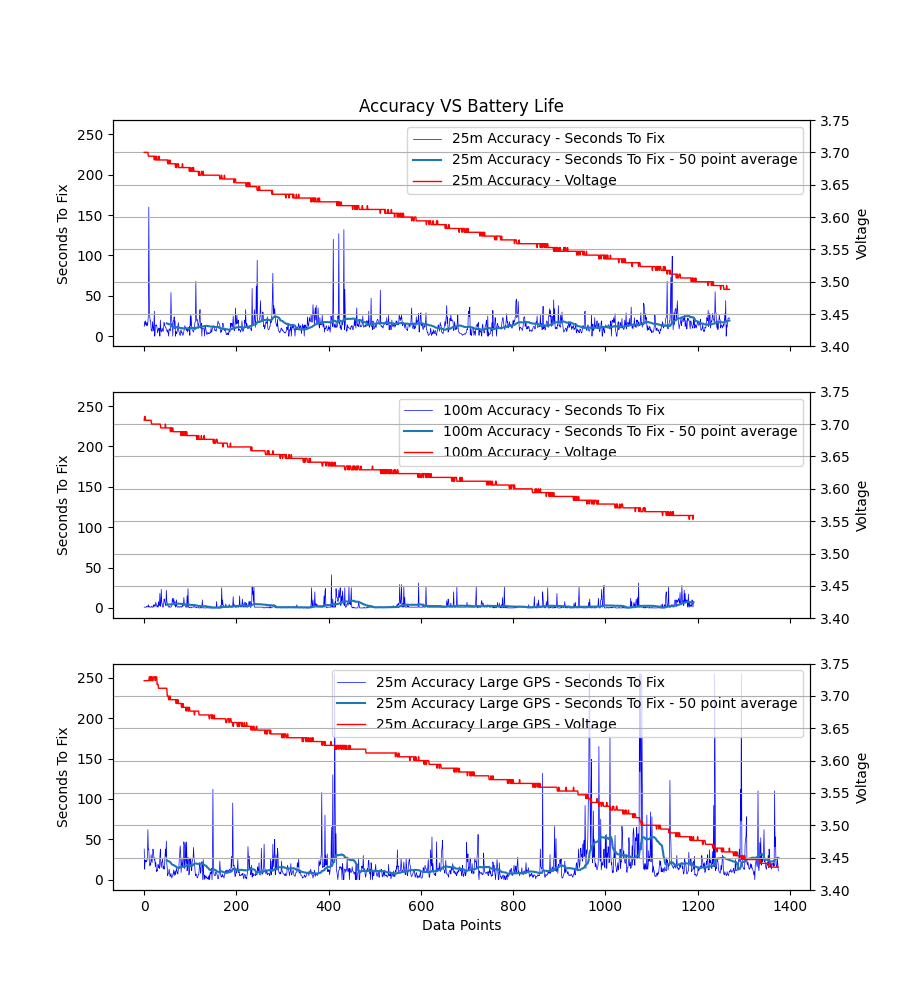

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)
period = 50

ax1.plot(bat_25m_s["SecondsToFix"], label = "25m Accuracy - Seconds To Fix", linewidth=0.5, color='blue')
ax1.plot(bat_25m_s["SecondsToFix"].rolling(period).mean(), label = "25m Accuracy - Seconds To Fix - "+str(period)+ " point average")
ax1_volt= ax1.twinx()
ax1_volt.plot(bat_25m_s["CalcVoltage"], label = "25m Accuracy - Voltage", linewidth=1, color='red')

ax2.plot(bat_100m["SecondsToFix"], label = "100m Accuracy - Seconds To Fix", linewidth=0.5, color='blue')
ax2.plot(bat_100m["SecondsToFix"].rolling(period).mean(), label = "100m Accuracy - Seconds To Fix - "+str(period)+ " point average")
ax2_volt = ax2.twinx()
ax2_volt.plot(bat_100m["CalcVoltage"], label = "100m Accuracy - Voltage", linewidth=1, color='red')

ax3.plot(bat_25m_l["SecondsToFix"], label = "25m Accuracy Large GPS - Seconds To Fix", linewidth=0.5, color='blue')
ax3.plot(bat_25m_l["SecondsToFix"].rolling(period).mean(), label = "25m Accuracy Large GPS - Seconds To Fix - "+str(period)+ " point average")
ax3_volt= ax3.twinx()
ax3_volt.plot(bat_25m_l["CalcVoltage"], label = "25m Accuracy Large GPS - Voltage", linewidth=1, color='red')


ax2_volt.set_ylim([3.4, 3.75])
ax2_volt.grid(axis='both', which='both')
ax1_volt.set_ylim([3.4, 3.75])
ax1_volt.grid(axis='both', which = 'both')
ax3_volt.set_ylim([3.4, 3.75])
ax3_volt.grid(axis='both', which = 'both')

ax1_volt.set_ylabel("Voltage")
ax2_volt.set_ylabel("Voltage")
ax3_volt.set_ylabel("Voltage")

ax1.set_ylabel("Seconds To Fix")
ax2.set_ylabel("Seconds To Fix")
ax3.set_ylabel("Seconds To Fix")

ax3.set_xlabel("Data Points")


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

lines1_volt, labels1_volt = ax1_volt.get_legend_handles_labels()
lines2_volt, labels2_volt = ax2_volt.get_legend_handles_labels()
lines3_volt, labels3_volt = ax3_volt.get_legend_handles_labels()

leg1 = ax1.legend(lines1 + lines1_volt, labels1 + labels1_volt, loc='upper right')
leg2 = ax2.legend(lines2 + lines2_volt, labels2 + labels2_volt, loc='upper right')
leg3 = ax3.legend(lines3 + lines3_volt, labels3 + labels3_volt, loc='upper right')
ax1.set_title("Accuracy VS Battery Life")
plt.savefig("BatteryComparison.png")

